## Keras-ImageDataGenerator

## 『本次練習內容』
#### 學習使用Keras-ImageDataGenerator 與 Imgaug 做圖像增強

## 『本次練習目的』
  #### 熟悉Image Augmentation的實作方法
  #### 瞭解如何導入Imgae Augmentation到原本NN架構中

為了彌補資料不足，使用圖像增強( Image augmentation)，藉由旋轉、裁切、增加噪點、白化等技術，將原本的圖片做了一些『轉換』，如此一來，我們就增加了許多的資料，另外也可以避免過擬和(Overfitting)。

---

## 第一 Part

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

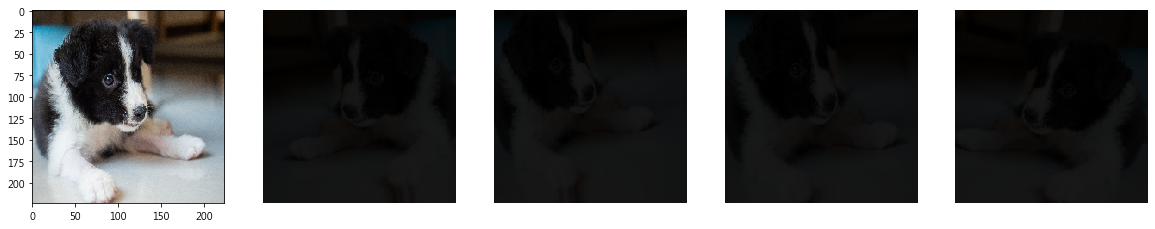

In [1]:
# 載入套件
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

##定義使用的Augmentation
img_gen = ImageDataGenerator(featurewise_center=True,#以每一張feature map為單位將平均值設為0。
                             featurewise_std_normalization=True, #以每一張feature map為單位將數值除以其標準差
                             rotation_range = 10, #整數值，控制隨機旋轉⾓角度
                             width_shift_range = 0.1, #圖像寬度上隨機偏移值
                             height_shift_range = 0.1, #圖像高度上隨機偏移值
                             shear_range = 0.1, #浮點數，裁切範圍。
                             zoom_range = 0.1, #浮點數或範圍，隨機縮放比例
                             horizontal_flip = True , #隨機水平翻轉
                             vertical_flip = False, #隨機垂直翻轉
                             rescale =0.1,  #數值，縮放比例
                             dtype=np.float32 
                            )
width=224
height=224
batch_size=4

img = cv2.imread('Tano.JPG')  ##讀取圖片
img = cv2.resize(img, (224,224))##改變圖片尺寸，使用cv2.resize時，參數輸入是寬 × 高 × 通道
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy() # 複製圖像
img= np.array(img, dtype=np.float32) #圖片轉換為陣列元素
img_combine=np.array([img,img,img,img],dtype=np.uint8) ##輸入generator要是四維，(224,224,3)變成(4,224,224,3)
batch_gen = img_gen.flow(img_combine, batch_size=4) # 接收numpy和標籤為參數，生成通過數據提升或標準化後的batch數據，並在一個無限循環中不斷的返回batch數據
assert next(batch_gen).shape==(batch_size, width, height, 3)
"""
assert 後面的 expression 是在判斷此 expression 是否為 true，若為 True 則不會有 error 訊息產生。
以此例的 next(batch_gen).shape 結果為  (4, 224, 224, 3)，如果你的 code 沒問題的話，
next(batch_gen).shape 會等於 (batch_size, width, height, 3)，則 assert 不會產生錯誤訊息。
"""

plt.figure(figsize=(20,10))
i = 1
for batch in batch_gen:
    plt.subplot(1, 5, 1)
    plt.imshow(img_origin) ##原圖
    plt.subplot(1, 5, i+1)
    plt.imshow(batch[0, :, :, :].astype(np.uint8))
    plt.imshow(batch[1, :, :, :].astype(np.uint8))
    plt.imshow(batch[2, :, :, :].astype(np.uint8))
    plt.imshow(batch[3, :, :, :].astype(np.uint8))
    plt.axis('off')
    i += 1
    if i > 4:
        break  # or the generator would loop infinitely

## 示範如何導入ImageDataGenerator到Keras訓練中

In [2]:
from keras.models import *
from keras.layers import *
#Training Generator
train_datagen = ImageDataGenerator(rescale = 2,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
"""
參數說明
rescale=2，縮放比例，放大2倍。
shear_range=0.2，裁切範圍。
zoom_range = 0.2，隨機縮小0.2
horizontal_flip = True，隨機水平翻轉。
"""
#Test Generator，只需要Rescale，不需要其他增強
test_datagen = ImageDataGenerator(rescale = 1./255)
"""
參數說明
rescale=1./255，縮放比例，縮小1./255倍。
"""
#將路徑給Generator，自動產生Label
training_set = train_datagen.flow_from_directory('D:\\Jupyter\\2st-DL-CVMarathon\\Day016\\dataset\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:\\Jupyter\\2st-DL-CVMarathon\\Day016\\dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')
"""
參數說明:
'dataset\training_set':目標文件夾路徑，對於每一個類，該文件夾必須包含一個子文件夾。
'dataset\test_set':目標文件夾路徑，對於每一個類，該文件夾必須包含一個子文件夾。
target_size：整數tuple,預設維度(256,256)，圖像將被resize成該尺寸。
batch_size: batch數據大小。
class_mode:該參數決定了返回的標籤數據的形式，"categorical":2D的one-hot標籤編碼。
"""
##定義classifier
img_input = Input(shape=(64,64,3))
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Flatten(name='flatten')(x)
x = Dense(2, activation='sigmoid', name='fc1')(x)
classifier = Model(img_input, x, name='classifier')

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#訓練
classifier.fit_generator(training_set,
                         steps_per_epoch = 1,
                         nb_epoch = 25,
                         validation_data = test_set,
                         validation_steps = 20)
"""
steps_per_epoch:整數，當生成器返回steps_per_epoch次數據時計一個epoch結束，執行下一個epoch
validation_data：具有以下三種形式之一
    生成驗證集的生成器
    一個形如（inputs,targets）的tuple
    一個形如（inputs,targets，sample_weights）的tuple。
validation_steps： 當validation_data為生成器時，本參數指定驗證集的生成器返回次數。
"""

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=1, validation_data=<keras_pre..., validation_steps=20, epochs=25)`


Epoch 1/25
1/1 [==============================] - 3s 3s/step - loss: 5.4784 - acc: 0.4000 - val_loss: 0.7594 - val_acc: 0.5000
Epoch 2/25
1/1 [==============================] - 1s 523ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.9106 - val_acc: 0.5000
Epoch 3/25
1/1 [==============================] - 1s 544ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.1369 - val_acc: 0.5000
Epoch 4/25
1/1 [==============================] - 1s 527ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.4144 - val_acc: 0.5000
Epoch 5/25
1/1 [==============================] - 1s 519ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 1.7243 - val_acc: 0.5000
Epoch 6/25
1/1 [==============================] - 1s 525ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 2.0557 - val_acc: 0.5000
Epoch 7/25
1/1 [==============================] - 1s 519ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 2.3987 - val_acc: 0.5000
Epoch 8/25
1/1 [==============================] - 1s 523ms/step - loss: 8.0590 - acc: 0.5000 

'\nsteps_per_epoch:整數，當生成器返回steps_per_epoch次數據時計一個epoch結束，執行下一個epoch\nvalidation_data：具有以下三種形式之一\n    生成驗證集的生成器\n    一個形如（inputs,targets）的tuple\n    一個形如（inputs,targets，sample_weights）的tuple。\nvalidation_steps： 當validation_data為生成器時，本參數指定驗證集的生成器返回次數。\n'

In [3]:
#預測新照片
from keras.preprocessing import image as image_utils
test_image = image_utils.load_img('D:\\Jupyter\\2st-DL-CVMarathon\\Day016\\dataset\\new_images\\cat.4001.jpg', target_size=(64, 64)) 
"""
load_img是keras調用了pillow的Image函數，對指定file_path的圖片進行提取，shape為(64, 64,3)
"""
test_image = image_utils.img_to_array(test_image)  # img_to_array把圖片轉換成為numpy數組
test_image = np.expand_dims(test_image, axis=0) # expand_dims是把shape( 224, 224, 3)轉換成(1, 224, 224, 3)
"""
使用expand_dims的原因是因為模型本身輸入尺寸是(None, 224, 224, 3)，
這個None表示batch，意思是你要輸入多少張圖片模型是不知道的，
所以就用None來表示，而當你輸入圖片的時候，
shape必須跟模型輸入的shape保持一致才能輸入。
"""
result = classifier.predict_on_batch(test_image) #返回一批樣本的模型預測值。

In [4]:
print("預測結果:",result)

預測結果: [[0. 0.]]


---

## 練習使用Imgaug

#### 使用單項增強

## Imgaug Part01 範例練習 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


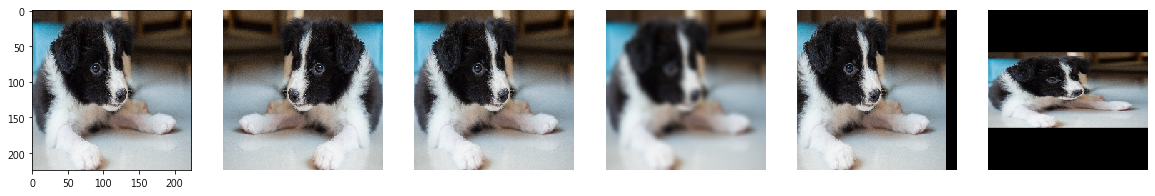

In [5]:
# 載入套件
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('Tano.JPG') ##讀取圖像
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy() ##複製圖像
img= np.array(img, dtype=np.float32) #圖片轉換為陣列元素

images = np.random.randint(0, 255, (5, 224, 224, 3), dtype=np.uint8)##創造一個array size==(5, 224, 224, 3)

flipper = iaa.Fliplr(1.0) #水平翻轉機率==1.0
images[0] = flipper.augment_image(img) 

vflipper = iaa.Flipud(0.4) #垂直翻轉機率40%
images[1] = vflipper.augment_image(img) 

blurer = iaa.GaussianBlur(3.0)
images[2] = blurer.augment_image(img) # 高斯模糊圖像( sigma of 3.0)

translater = iaa.Affine(translate_px={"x": -16}) #向左橫移16個像素
images[3] = translater.augment_image(img) 

scaler = iaa.Affine(scale={"y":(0.8,0.12)}) # 縮放照片，區間(0.8-1.2倍)
images[4] = scaler.augment_image(img)

i=1
plt.figure(figsize=(20,20))
for image in images:
    plt.subplot(1, 6, 1)
    plt.imshow(img_origin.astype(np.uint8))
    plt.subplot(1, 6, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    i+=1

---

## 第二Part

#### 打包多種Augmentation

#### 請學員自行練習新增以及改變Augmentation內容
#### 可參考Github: https://github.com/aleju/imgaug

## Imgaug Part02 範例練習

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


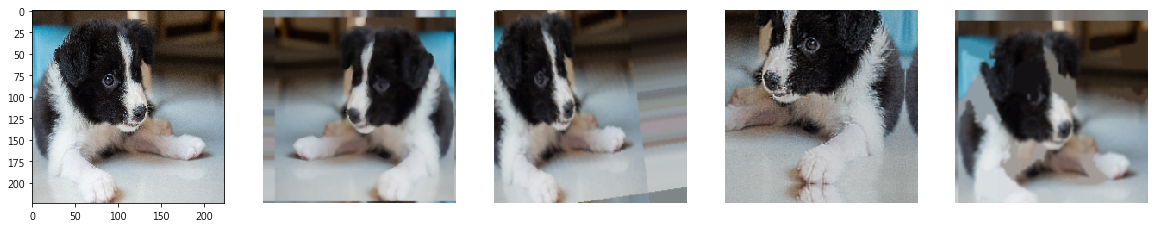

In [6]:
# 載入套件
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
%matplotlib inline

##輸入照片
img = cv2.imread('Tano.JPG') ##讀取圖片
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB
img_origin=img.copy() ##複製圖像
img= np.array(img,dtype=np.uint8) #圖片轉換為陣列元素)

img_combine=np.array([img,img,img,img],dtype=np.uint8) #輸入generator要是四維，(224,224,3)變成(4,224,224,3)

sometimes = lambda aug: iaa.Sometimes(0.5, aug) # Sometimes(0.5, ...) 代表每次都有50%的機率運用不同的Augmentation

## 包裝想運用之圖像強化方式
## 用Sequential打包所有想要應用的Augmentation
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), #從每側裁剪影象0到16px（隨機選擇）
    iaa.Fliplr(0.4),     #水平翻轉影像機率==0.4
   sometimes(iaa.CropAndPad( #CropAndPad: 擷取(crop)或填充(pad),填充時,被填充區域為黑色。
        percent=(-0.05, 0.1),
        pad_mode=ia.ALL,
        pad_cval=(0, 255)
    )),
    sometimes(iaa.Affine( #Affin:仿射變換
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, 
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, 
        rotate=(-10, 10),
        shear=(-8, 8), 
        order=[0, 1], 
        cval=(0, 255),
        mode=ia.ALL 
    )),
    sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
    sometimes(iaa.OneOf([ #OneOf:每次從一系列Augmenters中選擇一個來變換。
    iaa.GaussianBlur((0, 3.0)), # blur images 
                    iaa.AverageBlur(k=(1,3)), # blur image using local means with kernel sizes between 1 and 3，AverageBlur:從最鄰近畫素中取均值來擾動。
                    iaa.MedianBlur(k=(3, 5)), # blur image using local medians with kernel sizes between 3 and 5，MedianBlur:通過最近鄰中位數來擾動
                ])),
     sometimes(iaa.Sharpen(alpha=(0, 0.2), lightness=(0.1, 0.4))), # sharpen images，Sharpen:銳化
     sometimes(iaa.Emboss(alpha=(0, 0.3), strength=(0, 0.5))), # emboss images，Emboss:浮雕效果
    ],random_order=True)



images_aug = seq.augment_images(img_combine) ## Image Augmentation

##畫出來
i=1
plt.figure(figsize=(20,20))
for image in images_aug:
    plt.subplot(1, 5, 1)
    plt.imshow(img_origin.astype(np.uint8)) ##原圖
    plt.subplot(1, 5, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    i+=1

## 包裝自定義Augmentation 與 Imgaug Augmentation

## Imgaug-pipeline

將自己定義的 Augmentation 混合 imgaug 打造一個 pipeline

In [7]:
# 載入套件
from PIL import Image
import os
import pickle
import numpy as np
import cv2
import glob
import pandas as pd
import time
import random
import imgaug as ia
import imgaug.augmenters as iaa

'''隨機改變亮度'''    
class RandomBrightness(object):
    '''Function to randomly make image brighter or darker
    Parameters
    ----------
    delta: float
        the bound of random.uniform distribution
    '''
    def __init__(self, delta=16):
        assert 0 <= delta <= 255
        self.delta = delta

    def __call__(self, image):
        delta = random.uniform(-self.delta, self.delta)
        if random.randint(0, 1):
            image = image + delta
        image = np.clip(image, 0.0, 255.0)
        return image
    
'''隨機改變對比'''
class RandomContrast(object):
    '''Function to strengthen or weaken the contrast in each image
    Parameters
    ----------
    lower: float
        lower bound of random.uniform distribution
    upper: float
        upper bound of random.uniform distribution
    '''
    def __init__(self, lower=0.5, upper=1.5):
        assert upper >= lower, "contrast upper must be >= lower."
        assert lower >= 0, "contrast lower must be non-negative."
        self.lower = lower
        self.upper = upper

    def __call__(self, image):
        alpha = random.uniform(self.lower, self.upper)
        if random.randint(0, 1):
            image = image * alpha
        image = np.clip(image, 0.0, 255.0)
        return image
    
'''包裝所有Augmentation'''
class Compose(object):
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image):
        for t in self.transforms:
            image= t(image)
        return image

'''包裝Imgaug'''
class ImgAugSequence(object):
    def __init__(self, sequence):
        self.sequence = sequence

    def __call__(self, image):
        image = self.sequence.augment_image(image)
      
        return image
    
class TrainAugmentations(object):
    def __init__(self):
        #Define imgaug.augmenters Sequential transforms
        sometimes = lambda aug: iaa.Sometimes(0.4, aug) # applies the given augmenter in 50% of all cases

        img_seq = iaa.Sequential([
             sometimes(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.03*255), per_channel=0.5)),
             sometimes(iaa.ContrastNormalization((0.5, 2.0), per_channel=1),),
             sometimes(iaa.Sharpen(alpha=(0, 0.2), lightness=(0.1, 0.4))), # sharpen images
             sometimes(iaa.Emboss(alpha=(0, 0.3), strength=(0, 0.5))), # emboss images
            ],random_order=True)
        
        self.aug_pipeline = Compose([
            RandomBrightness(16), #make image brighter or darker
            RandomContrast(0.9, 1.1), #strengthen or weaken the contrast in each image
            ImgAugSequence(img_seq),
        ])
        

    def __call__(self, image):
        image= self.aug_pipeline(image)
        return image
    
Augmenation=TrainAugmentations()

C:\ProgramData\Anaconda3\lib\site-packages\imgaug\imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


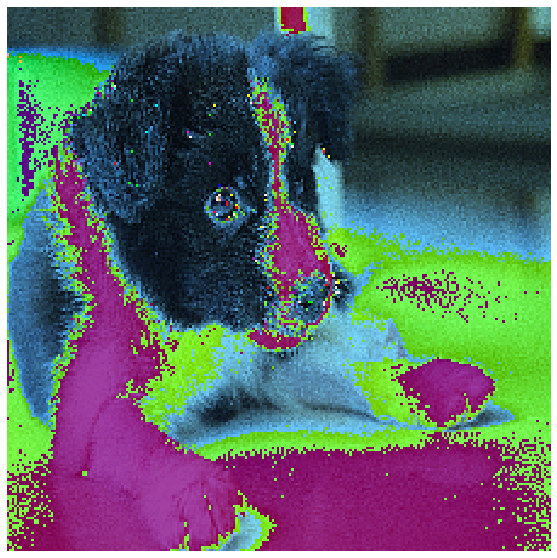

In [8]:
# 載入套件
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
%matplotlib inline

##輸入照片
img = cv2.imread('Tano.JPG')## 讀取圖片  
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB

output=Augmenation(img) 

##畫出來
plt.figure(figsize=(10,10))
for image in images_aug:
    plt.imshow(output.astype(np.uint8))
    plt.axis('off')


## 鎖住隨機性-主要用在Semantic segmentation中

## 範例 

In [21]:
class MaskAugSequence(object):
    def __init__(self, sequence):
        self.sequence = sequence

    def __call__(self, image, mask):
        sequence = self.sequence.to_deterministic() ##用來關閉隨機性
        image = sequence.augment_image(image)
        mask = sequence.augment_image(mask)
        image,  mask= image.astype(np.float32), mask.astype(np.float32)
        return image,  mask

## 範例操作練習，做修改

In [22]:
'''隨機改變亮度'''    
class RandomBrightness(object):
    '''Function to randomly make image brighter or darker
    Parameters
    ----------
    delta: float
        the bound of random.uniform distribution
    '''
    def __init__(self, delta=16):
        assert 0 <= delta <= 255
        self.delta = delta

    def __call__(self, image):
        delta = random.uniform(-self.delta, self.delta)
        if random.randint(0, 1):
            image = image + delta
        image = np.clip(image, 0.0, 255.0)
        return image
    
'''隨機改變對比'''
class RandomContrast(object):
    '''Function to strengthen or weaken the contrast in each image
    Parameters
    ----------
    lower: float
        lower bound of random.uniform distribution
    upper: float
        upper bound of random.uniform distribution
    '''
    def __init__(self, lower=0.5, upper=1.5):
        assert upper >= lower, "contrast upper must be >= lower."
        assert lower >= 0, "contrast lower must be non-negative."
        self.lower = lower
        self.upper = upper

    def __call__(self, image):
        alpha = random.uniform(self.lower, self.upper)
        if random.randint(0, 1):
            image = image * alpha
        image = np.clip(image, 0.0, 255.0)
        return image
    
'''包裝所有Augmentation'''
class MaskAugSequence(object):
    def __init__(self, sequence):
        self.sequence = sequence

    def __call__(self, image, mask):
        sequence = self.sequence.to_deterministic() ##用來關閉隨機性
        image = sequence.augment_image(image)
        mask = sequence.augment_image(mask)
        image,  mask= image.astype(np.float32), mask.astype(np.float32)
        return image,  mask

'''包裝Imgaug'''
class ImgAugSequence(object):
    def __init__(self, sequence):
        self.sequence = sequence

    def __call__(self, image):
        image = self.sequence.augment_image(image)
      
        return image
    
class TrainAugmentations(object):
    def __init__(self):
        #Define imgaug.augmenters Sequential transforms
        sometimes = lambda aug: iaa.Sometimes(0.4, aug) # applies the given augmenter in 50% of all cases

        img_seq = iaa.Sequential([
             sometimes(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.03*255), per_channel=0.5)),
             sometimes(iaa.ContrastNormalization((0.5, 2.0), per_channel=1),),
             sometimes(iaa.Sharpen(alpha=(0, 0.2), lightness=(0.1, 0.4))), # sharpen images
             sometimes(iaa.Emboss(alpha=(0, 0.3), strength=(0, 0.5))), # emboss images
            ],random_order=True)
        
        self.aug_pipeline = Compose([
            RandomBrightness(16), #make image brighter or darker
            RandomContrast(0.9, 1.1), #strengthen or weaken the contrast in each image
            ImgAugSequence(img_seq),
        ])
        

    def __call__(self, image):
        image= self.aug_pipeline(image)
        return image
    
Augmenation2 =TrainAugmentations()

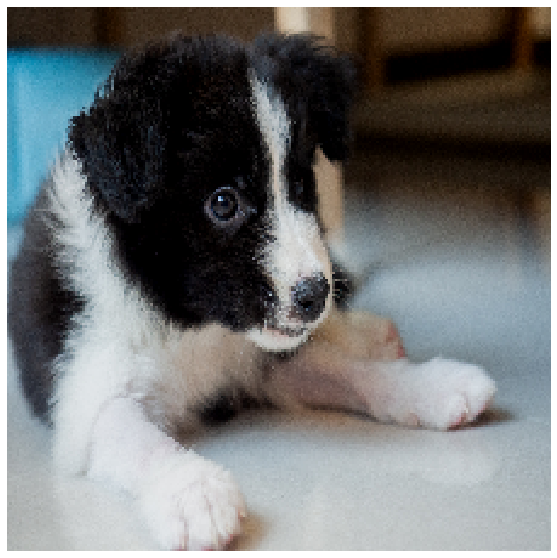

In [23]:
# 載入套件
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
%matplotlib inline

##輸入照片
img = cv2.imread('Tano.JPG')## 讀取圖片  
img = cv2.resize(img, (224,224))##改變圖片尺寸
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Cv2讀進來是BGR，轉成RGB

output=Augmenation2(img) 

##畫出來
plt.figure(figsize=(10,10))
for image in images_aug:
    plt.imshow(output.astype(np.uint8))
    plt.axis('off')